In [18]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

In [19]:
from sklearn.decomposition import PCA
import numpy as np

In [25]:
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)
X_2dim.shape
pca.explained_variance_ratio_

array([ 0.09746116,  0.07155445])

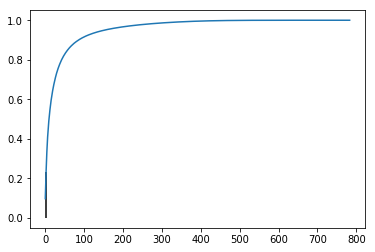

In [33]:
pca = PCA(n_components=784)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[2],x=2)

The first two components are able to explain just shy of 20% of our variance.

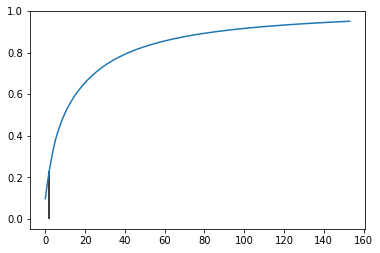

In [40]:
pca = PCA(n_components=.95)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[2],x=2)

160 components are chosen in order to account for 95% of the variance.

In [2]:
from sklearn.manifold import TSNE


#first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results1 = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.058s...
[t-SNE] Computed neighbors for 10000 samples in 19.738s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.931113
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.033783
[t-SNE] Error after 1000 iterations: 1.669424


In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df_tsne = pd.DataFrame(tsne_results1, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

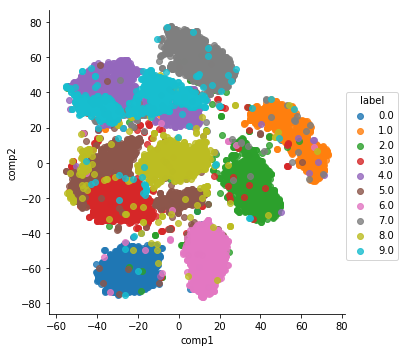

In [10]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

In [41]:
#are you robust to changes in perplexity?
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000, learning_rate=200)
tsne_results2 = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.290s...
[t-SNE] Computed neighbors for 10000 samples in 84.804s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.412707
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.551498
[t-SNE] Error after 1000 iterations: 1.551136


In [42]:
df_tsne2 = pd.DataFrame(tsne_results2, columns=['comp1', 'comp2'])
df_tsne2['label'] = y[rows[:n_select]]

In [34]:
#are you robust to changes in learning rate and number of iterations?
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=10000, learning_rate=100)
tsne_results3 = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.532s...
[t-SNE] Computed neighbors for 10000 samples in 175.216s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.209009
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.149155
[t-SNE] Error after 10000 iterations: 1.649482


Error, Sigma, and Divergence are relatively the same across these permutations.

K-MEANS

In [43]:
from sklearn.cluster import KMeans

In [ ]:
#how did you choose your k?
sses = []
for k in range(1,9):
    kmeans = KMeans(n_clusters=k, n_init=50, n_jobs=-1)
    kmeans.fit(X[:])
    sses.append(kmeans.inertia_)
plt.plot(range(1,9), sses)

In [ ]:
kmeans = KMeans(n_clusters=7, n_init=50, n_jobs=-1)
kmeans.fit(X[:])
sk_clusters = kmeans.predict(df_tsne2['comp1', 'comp2'])

In [ ]:
plt.scatter(df_tsne2['comp1'], df_tsne2['comp2'], c=sk_clusters)
plt.xlabel("Filled")
plt.ylabel("Unfilled")
plt.xlim(0,120000)
plt.ylim(0,120000)
plt.plot(range(120000), range(120000))

In [ ]:
#how did you evaluate your clustering?
from sklearn.metrics import silhouette_score

kmeans_model = KMeans(n_clusters=7, n_init=50, n_jobs=-1).fit(df[['comp1', 'comp2']])
labels = kmeans_model.labels_
silhouette_score(df[['com1', 'comp2']], labels, metric='euclidean')

Did you scale your data? Did not feel that I needed to, as the features are fairly comparable.

How robust is your clustering? Optimized, as I the K found was below the upper bound of the hyperparameter search (went from 1 to 9, selected 7 as the optimum in the graph). I did this in a separate notebook, my notebook here has not been able to progress past the "How did you choose your K?" portion, despite it being the exact same code that finished in 20 minutes before. As such, the remainder of this code will not have outputs. 

In [ ]:
import numpy as np
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

In [ ]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 1000

In [ ]:
Z = linkage(X, 'complete')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)